In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv("rawData.csv")
old = pd.read_csv("old_data.csv")

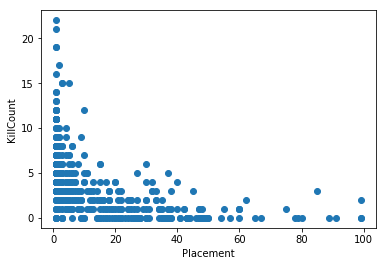

In [81]:
#Plot killcount and position of all data
df_scatter = df.iloc[:, 1:3]
x = df_scatter["Position"]
y = df_scatter["KillCount"]

plt.scatter(x,y)
plt.ylabel("KillCount")
plt.xlabel("Placement")
plt.show()


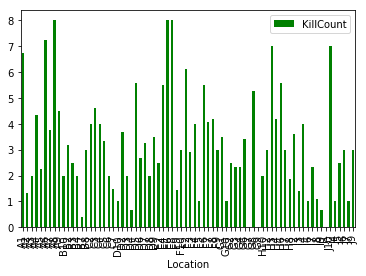

In [82]:
#Select Location and KillCount 
avg_kills = df.iloc[:,0:2]

#Average number of kills per location
group_kill = avg_kills.groupby('Location').agg('mean')


plot = group_kill.plot(kind = 'bar', color = 'green')

In [96]:
#Average position per drop location
avg_pos = df.iloc[:,0:3]
avg_poss = avg_pos[avg_pos['Position'] == 1]

group_pos = avg_poss.groupby('Location').agg('mean')
gp2 = group_pos.drop(['Position'], axis=1)
#plot = gp4.plot(kind='bar',color='blue')
gp2.describe()

,KillCount
count,43.000000
mean,5.370085
std,2.943797
min,0.000000
25%,3.000000
50%,5.000000
75%,7.633333
max,12.000000


In [ ]:
#Seperate the hand entered and trusted data from the data collected online

In [8]:
#This is the data collected from the web
df2 = pd.read_csv("Fortnite_Q.csv")

#Renaming the column headers to match previous data
df3 = df2.rename(index=str, columns={"Which quadrant did you land in? Use map below for reference": "Location", 
                                     "Which game mode were you in?": "Mode",
                                    "What place did you finish? (Example: 4)" : "Position",
                                    "How many kills did you get? (Example: 7)" : "KillCount"})

#Dropping the 'Mode' column
clean_data = df3.drop(df3.columns[2], axis=1)


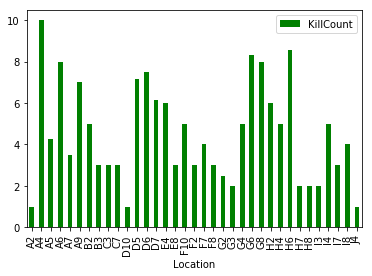

In [36]:
avg_kills2 = clean_data.iloc[:, 1:4].drop(clean_data.columns[2], axis=1)
#Average number of kills per location
group_kills = avg_kills2.groupby('Location').agg('mean')

group_kills

plot = group_kills.plot(kind = 'bar', color = 'green')


In [42]:
#Average position per drop location
avg_pos2 = clean_data.iloc[:,[1,2]]
avg_pos3 = clean_data[clean_data['Position'] == 1]
avg_pos3

#Average kills per drop location that resulted in a win
group_pos2 = avg_pos3.groupby('Location').agg('mean')
gp4 = group_pos2.drop(['Position'], axis=1)
#plot = gp4.plot(kind='bar',color='blue')
gp4.describe()

,KillCount
count,19.000000
mean,6.260526
std,3.605437
min,0.000000
25%,5.000000
50%,5.333333
75%,8.000000
max,14.200000


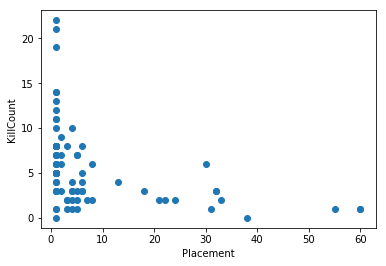

In [78]:
#Scatter plot with online data
df_scatter = clean_data.iloc[:, 2:4]
x = df_scatter["Position"]
y = df_scatter["KillCount"]

plt.scatter(x,y)
plt.ylabel("KillCount")
plt.xlabel("Placement")
plt.show()

In [88]:
#Linear regression for all data
target = df.iloc[:,2]

X = df["KillCount"]
Y = target

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Position   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.10
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           0.000940
Time:                        14:27:37   Log-Likelihood:                -1917.9
No. Observations:                 417   AIC:                             3838.
Df Residuals:                     416   BIC:                             3842.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KillCount      0.7482      0.225      3.332      0.001       0.307       1.190
==============================================================================
Omnibus:                      134.014   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.441
Skew:                           1.622   Prob(JB):                     3.54e-71
Kurtosis:                       5.854   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#Linear regression for testing set
target = clean_data.iloc[:,2]
clean_data

X = clean_data["KillCount"]
Y = target

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Position   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.862
Date:                Wed, 28 Mar 2018   Prob (F-statistic):             0.0948
Time:                        13:53:40   Log-Likelihood:                -320.57
No. Observations:                  77   AIC:                             643.1
Df Residuals:                      76   BIC:                             645.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KillCount      0.4215      0.249      1.692      0.095      -0.075       0.918
==============================================================================
Omnibus:                       49.656   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.908
Skew:                           2.259   Prob(JB):                     1.87e-30
Kurtosis:                       7.718   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
avg_pos = old.iloc[:,0:3]
avg_poss = avg_pos[avg_pos['Position'] == 1]

group_pos = avg_poss.groupby('Location').agg('mean')
gp2 = group_pos.drop(['Position'], axis=1)
#plot = gp4.plot(kind='bar',color='blue')
gp2.describe()

,KillCount
count,5.000000
mean,6.900000
std,3.435113
min,3.000000
25%,5.000000
50%,5.500000
75%,10.000000
max,11.000000
